# Social Defeat Dopamine Analysis

DA data

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from bouts_extension import *
from sd_extension import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\nac_csvs"
brain_region = '#15616F'

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\mpfc_csvs"
# brain_region = '#FFAF00'

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice_csvs"



In [3]:
bout_definitions = [
    {'prefix': 'bully', 'introduced': 'Subject_Introduced', 'removed': 'Subject_Removed'}
]

In [4]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice\n5-240916-092748\Notes.txt
read from t=0s to t=868.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice\n7-240916-113157\Notes.txt
read from t=0s to t=862.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice\nn1-250223-100216\Notes.txt
read from t=0s to t=866.05s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice\nn2-250223-102714\Notes.txt
read from t=0s to t=861.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice\nn3-250223-105155\Notes.txt
read from t=0s to t=864.35s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Defeat\all_mice\nn4-250223-111644\Notes.tx

### Peak standard z-score

In [5]:
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)

# total_avg_bout_duration = metadata_df["Average Bout Duration"].mean()
# print(f"Total Average Bout Duration: {total_avg_bout_duration:.4f}")
# Proceed with DA metric computation after all files are processed
experiment.compute_all_da_metrics(use_max_length=True,
                                  max_bout_duration=9, 
                                  mode='standard')


Processing behaviors for n5-240916-092748...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...
Processing behaviors for p1-240510-082326...
Processing behaviors for p2-240510-094249...
Processing behaviors for p3-240513-064912...
Processing behaviors for p5-240916-090016...
Processing behaviors for p6-240916-095652...
Processing behaviors for p7-240916-110418...
Processing behaviors for p8-240916-115836...
Processing behaviors for pp1-250223-093419...
Processing behaviors for pp2-250223-082553...
Processing behaviors for pp3-250223-084945...
Processing behaviors for pp4-250223-091227...
Processing behaviors for pp5-250223-132705.

In [6]:
exp_da_dict = get_trial_dataframes(experiment)

In [7]:
desired_bouts = ['bully-1']
da_metadata_df = create_da_metrics_dataframe(exp_da_dict, behavior="Defeat", desired_bouts=desired_bouts)

In [16]:
da_metadata_df

,Subject,Bout,Behavior,AUC,Max Peak,Mean Z-score,Region
0,n5,bully-1,Defeat,-0.192682,0.728400,0.023471,NAc
1,n7,bully-1,Defeat,-0.968190,0.029380,-0.411257,NAc
2,nn1,bully-1,Defeat,-5.756773,0.068959,-0.701915,NAc
3,nn2,bully-1,Defeat,-0.749169,0.710069,-0.117107,NAc
4,nn3,bully-1,Defeat,-1.399754,0.915603,-0.164964,NAc
5,nn4,bully-1,Defeat,-3.296089,0.720720,-0.530908,NAc
6,nn5,bully-1,Defeat,-2.645384,0.467440,-0.304583,NAc
7,nn6,bully-1,Defeat,-0.464549,1.027671,0.338279,NAc
8,nn7,bully-1,Defeat,3.379607,1.415657,0.717720,NAc
9,nn8,bully-1,Defeat,0.966471,0.781268,0.297937,NAc


Comparing mice

In [17]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# --- 1) Build a single‐metric DataFrame for each region ---
# Suppose da_metadata_df has columns ['Subject','Bout','Behavior','AUC',…]
# and contains both NAc and mPFC animals (you can merge them into one df first).

# Add a “Region” column by looking at your subject naming convention:
# e.g. subject names starting with 'n' → NAc, 'p' → mPFC
da_metadata_df['Region'] = da_metadata_df['Subject'].str[0].map({
    'n':'NAc',
    'p':'mPFC'
})

# Filter down to first defeat bout, and defeat behavior
df1 = da_metadata_df.query("Bout=='bully-1' and Behavior=='Defeat'")

# Now split:
nac_auc  = df1 .loc[df1.Region=='NAc','AUC'].values
mpfc_auc = df1 .loc[df1.Region=='mPFC','AUC'].values

# --- 2) Independent‐samples t‐test ---
t_stat, p_val = ttest_ind(nac_auc, mpfc_auc,
                          nan_policy='omit',
                          equal_var=False)
print(f"t = {t_stat:.2f}, p = {p_val:.5f}")

# --- 3) Cohen’s d for independent samples ---
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    # pooled standard deviation
    dof = nx + ny - 2
    s_pooled = np.sqrt(
        ((nx-1)*np.nanvar(x, ddof=1) + (ny-1)*np.nanvar(y, ddof=1))
        / dof
    )
    return (np.nanmean(x) - np.nanmean(y)) / s_pooled

d = cohens_d(nac_auc, mpfc_auc)
print(f"Cohen’s d = {d:.2f}")


t = -4.75, p = 0.00009
Cohen’s d = -1.73


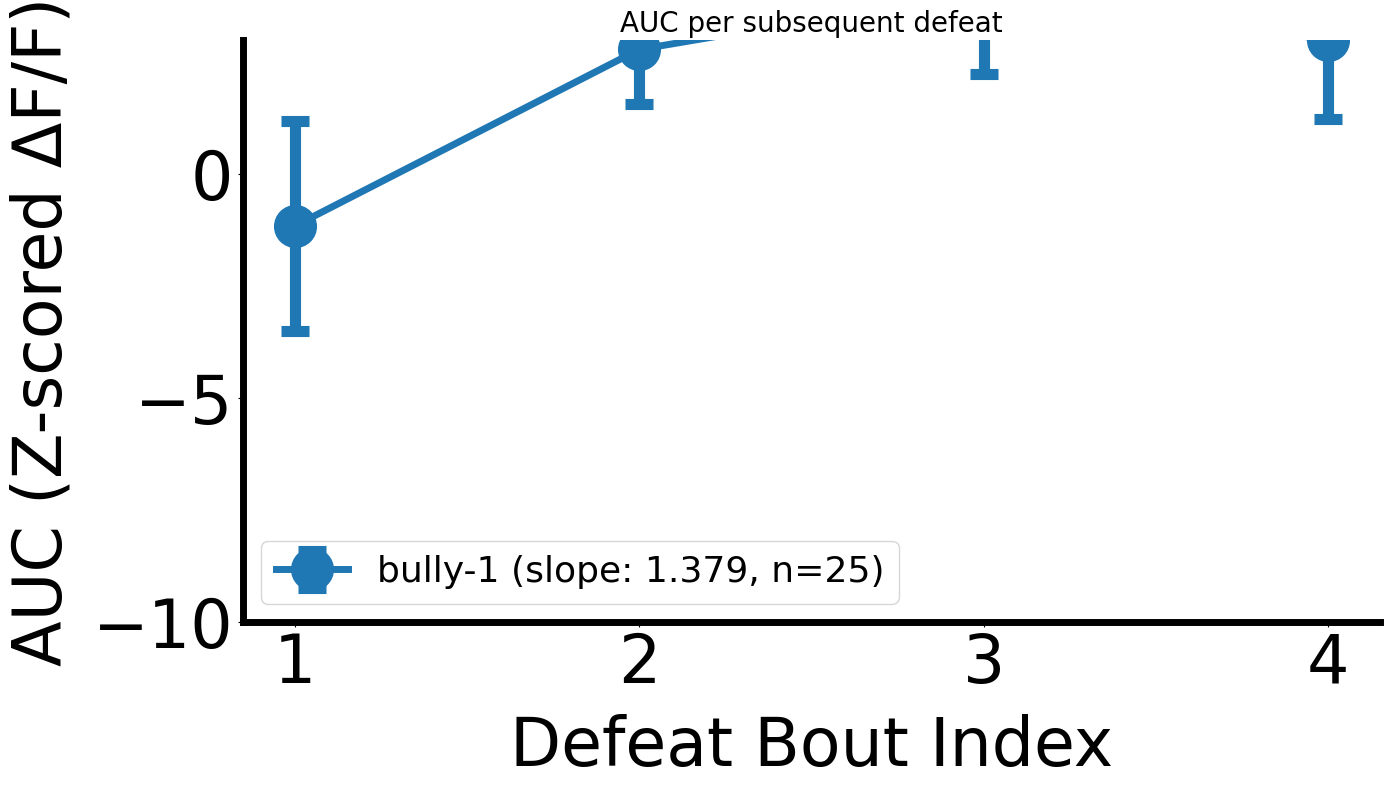


=== Computed Metric (SLOPE): ===
Bout: bully-1, slope = 1.379


,Bout,BehaviorIndex,SubjectCount,AvgPeak,StdPeak,SEM
0,bully-1,1,25,-1.153074,11.709577,2.341915
1,bully-1,2,25,2.796475,6.064916,1.212983
2,bully-1,3,24,4.096940,9.044632,1.846228
3,bully-1,4,24,3.010673,8.647380,1.765139


In [9]:
plot_peak_for_subsequent_behaviors(exp_da_dict, 
                                   selected_bouts=["bully-1"], 
                                   behavior="Defeat", 
                                   n_subsequent_behaviors=4,
                                   peak_col='AUC',
                                   xlabel="Defeat Bout Index",
                                    ylabel="AUC (Z-scored ΔF/F)",
                                    plot_title="AUC per subsequent defeat",
                                    ylim = (-10, 3),
                                    custom_colors=None,
                                    save_path=None)
                                    # figsize=(14,8),
                                    # save_path=r"C:\Users\alber\OneDrive\Documents\GitHub\Fiber_Photometry\Social_Defeat\mPFC_defeat.png")


In [10]:
experiment.reset_all_behaviors()
experiment.group_extract_manual_annotations(bout_definitions=bout_definitions, first_only = False)


Processing behaviors for n5-240916-092748...
Processing behaviors for n7-240916-113157...
Processing behaviors for nn1-250223-100216...
Processing behaviors for nn2-250223-102714...
Processing behaviors for nn3-250223-105155...
Processing behaviors for nn4-250223-111644...
Processing behaviors for nn5-250223-114717...
Processing behaviors for nn6-250223-120921...
Processing behaviors for nn7-250223-123200...
Processing behaviors for nn8-250223-125722...
Processing behaviors for p1-240510-082326...
Processing behaviors for p2-240510-094249...
Processing behaviors for p3-240513-064912...
Processing behaviors for p5-240916-090016...
Processing behaviors for p6-240916-095652...
Processing behaviors for p7-240916-110418...
Processing behaviors for p8-240916-115836...
Processing behaviors for pp1-250223-093419...
Processing behaviors for pp2-250223-082553...
Processing behaviors for pp3-250223-084945...
Processing behaviors for pp4-250223-091227...
Processing behaviors for pp5-250223-132705.

In [11]:
experiment.compute_all_event_induced_DA(pre_time=4, post_time=10)

Computing event-induced DA for trial n5-240916-092748 ...
Computing event-induced DA for trial n7-240916-113157 ...
Computing event-induced DA for trial nn1-250223-100216 ...
Computing event-induced DA for trial nn2-250223-102714 ...
Computing event-induced DA for trial nn3-250223-105155 ...
Computing event-induced DA for trial nn4-250223-111644 ...
Computing event-induced DA for trial nn5-250223-114717 ...
Computing event-induced DA for trial nn6-250223-120921 ...
Computing event-induced DA for trial nn7-250223-123200 ...
Computing event-induced DA for trial nn8-250223-125722 ...
Computing event-induced DA for trial p1-240510-082326 ...
Computing event-induced DA for trial p2-240510-094249 ...
Computing event-induced DA for trial p3-240513-064912 ...
Computing event-induced DA for trial p5-240916-090016 ...
Computing event-induced DA for trial p6-240916-095652 ...
Computing event-induced DA for trial p7-240916-110418 ...
Computing event-induced DA for trial p8-240916-115836 ...
Comput

In [12]:
# experiment.trials['n7-240916-113157'].behaviors.head()

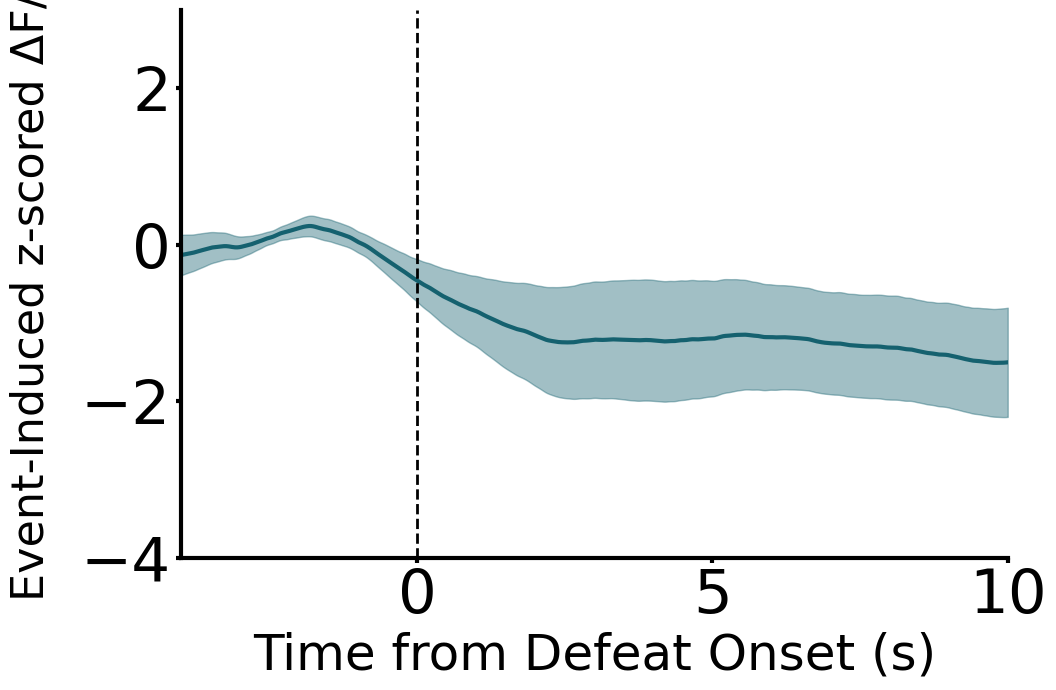

{'common_time_axis': array([-4.        , -3.99901696, -3.99803392, ...,  9.99750628,
         9.99848932,  9.99947236]),
 'mean_trace': array([-0.13305802, -0.13296791, -0.13282613, ..., -1.50262783,
        -1.5025235 , -1.50241815]),
 'sem_trace': array([0.25991253, 0.25984556, 0.25971087, ..., 0.69761631, 0.69764573,
        0.69767266]),
 'n_trials': 25,
 'subject_ids': ['n5',
  'n7',
  'nn1',
  'nn2',
  'nn3',
  'nn4',
  'nn5',
  'nn6',
  'nn7',
  'nn8',
  'p1',
  'p2',
  'p3',
  'p5',
  'p6',
  'p7',
  'p8',
  'pp1',
  'pp2',
  'pp3',
  'pp4',
  'pp5',
  'pp6',
  'pp7',
  'pp8']}

In [13]:
plot_average_defeat_bout_psth(
    experiment=experiment,
    nth_defeat=1,
    save=False,
    save_path= r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout1_Average.png",
    y_min=-4, 
    y_max=3,
    brain_region=brain_region
)


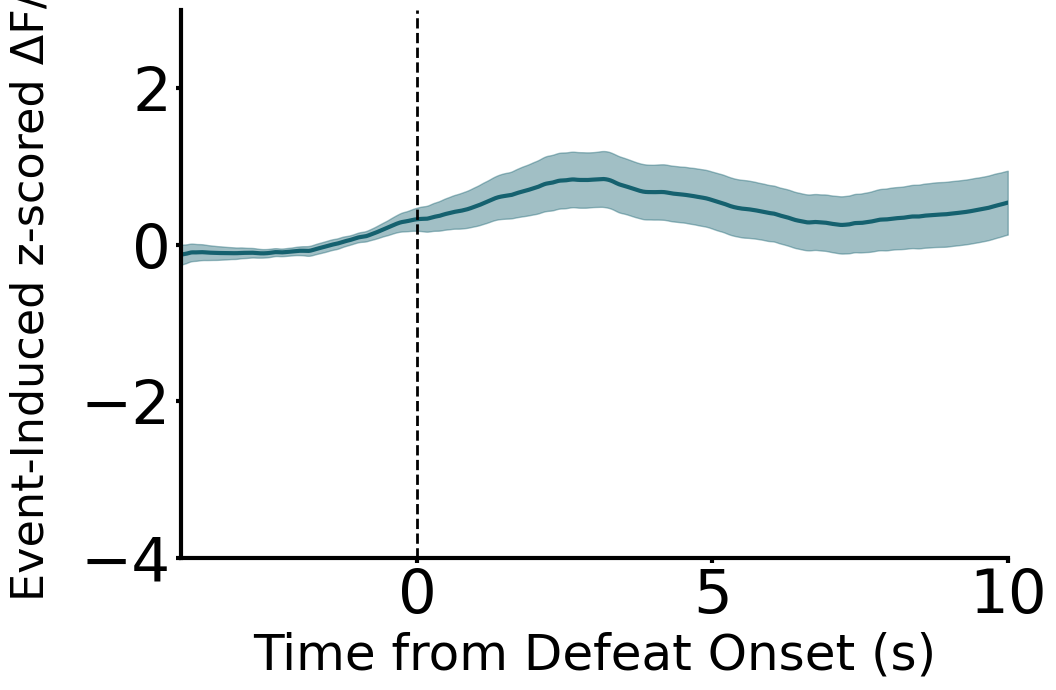

{'common_time_axis': array([-4.        , -3.99901696, -3.99803392, ...,  9.99750628,
         9.99848932,  9.99947236]),
 'mean_trace': array([-0.12771584, -0.12772205, -0.12758395, ...,  0.53726888,
         0.53742454,  0.53758133]),
 'sem_trace': array([0.12838892, 0.12835098, 0.1282612 , ..., 0.40808853, 0.40807482,
        0.40806141]),
 'n_trials': 25,
 'subject_ids': ['n5',
  'n7',
  'nn1',
  'nn2',
  'nn3',
  'nn4',
  'nn5',
  'nn6',
  'nn7',
  'nn8',
  'p1',
  'p2',
  'p3',
  'p5',
  'p6',
  'p7',
  'p8',
  'pp1',
  'pp2',
  'pp3',
  'pp4',
  'pp5',
  'pp6',
  'pp7',
  'pp8']}

In [14]:
plot_average_defeat_bout_psth(
    experiment=experiment,
    nth_defeat=2,
    save=False,
    save_path=r"Social_Defeat\Social_Defeat_graphsplots/DefeatBout2_Average.png",
    y_min=-4, 
    y_max=3,
    brain_region=brain_region
)